<a href="https://colab.research.google.com/github/rauan-assabayev/machine_learning_labs/blob/master/Lab_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

An implementation of Linear Regression includes the hypothesis function, partial differentiation of variables, parameter update rule and gradient descent.

### What Is Linear Regression?

Linear regression is a method for approximating a linear relationship between two variables. While that may sound 
complicated, all it really means is that it takes some input variable, like the age of a house, and finds out how 
it's related to another variable, for example, the price it sells at. 


We use it when the data has a **linear relationship**, which means that when you plot the points on a graph, the
data lies approximately in the shape of a straight line.

Linear Regression involves a couple of steps:
1. Randomly initialising parameters for the hypothesis function
2. Computing the mean squared error
3. Calculating the partial derivatives
4. Updating the parameters based on the derivatives and the learning rate
5. Repeating from 2 until the error is minimised

### The Hypothesis Function
The linear equation is the standard form that represents a straight line on a graph, where m represents the gradient,
and b represents the y-intercept.

<img src="https://latex.codecogs.com/svg.latex?y&space;=&space;mx&space;&plus;c" title="y = mx +c" />

The **Hypothesis Function** is the exact same function in the notation of Linear Regression.

<img src="https://latex.codecogs.com/svg.latex?h_{\theta}(x)&space;=&space;\theta_{1}x&space;&plus;&space;\theta_{0}" title="h_{\theta}(x) = \theta_{1}x + \theta_{0}" />

The two variables we can change – m and b – are represented as parameters theta1 and theta0

### The Error Function
Clearly the line drawn in the graph above is wrong. But how wrong is it? That's what the error function is for - it 
calculates the total error of your graph.
We'll be using an error function called the Mean Squared Error function, or MSE, represented by the letter J.

<img src="https://latex.codecogs.com/svg.latex?J(\theta_{0},&space;\theta_{1})&space;=&space;\frac{1}{2}\sum_{i=1}^{m}(h_{\theta}(x_{i})&space;-&space;y_{i})^{2}" title="J(\theta_{0}, \theta_{1}) = \frac{1}{2}\sum_{i=1}^{m}(h_{\theta}(x_{i}) - y_{i})^{2}" />

Now while that may look complicated, what it's doing is actually quite simple. The function J takes our parameters 
theta0, and theta1 as an input. Then, from every point from 1 to m, where m is the number of points, it calculates 
the distance between the x value and the value predicted by our function and squares it. Squaring it ensures that 
the error is always positive, and that the error is greater the further away the predicted value is from the actual
value.

Now that we have a value for how wrong our function is, we need to adjust the function to reduce this error.

### Calculating Derivatives

If we graph our parameters against the error (i.e graphing the cost function), we'll find that it forms something similar to the graph below. Our goal is to find the lowest point of that graph, where the error is at its lowest. This is called minimising the cost function.

To do this, we need to consider what happens at the bottom of the graph - the gradient is zero. So to minimize the cost function, we need to get the gradient to zero.

The gradient is given by the derivative of the function, and the partial derivatives of the functions are

<a href="https://www.codecogs.com/eqnedit.php?latex=\frac{\delta&space;}{\delta&space;\theta_{0}}&space;=&space;h_{\theta}(x_{i})-&space;y_{i}" target="_blank"><img src="https://latex.codecogs.com/svg.latex?\frac{\delta&space;}{\delta&space;\theta_{0}}&space;=&space;h_{\theta}(x_{i})-&space;y_{i}" title="\frac{\delta }{\delta \theta_{0}} = h_{\theta}(x_{i})- y_{i}" /></a>

<a href="https://www.codecogs.com/eqnedit.php?latex=\frac{\delta&space;}{\delta&space;\theta_{0}}&space;=&space;(h_{\theta}(x_{i})-&space;y_{i})x_{i}" target="_blank"><img src="https://latex.codecogs.com/svg.latex?\frac{\delta&space;}{\delta&space;\theta_{0}}&space;=&space;(h_{\theta}(x_{i})-&space;y_{i})x_{i}" title="\frac{\delta }{\delta \theta_{0}} = (h_{\theta}(x_{i})- y_{i})x_{i}" /></a>

### Updating The Parameters Based On The Learning Rate

Now we need to update our parameters to reduce the gradient. To do this, we use the gradient update rule

<a href="https://www.codecogs.com/eqnedit.php?latex=\theta_{0}&space;=&space;\theta_{0}&space;-&space;\alpha\frac{\delta}{\delta&space;\theta_{0}}" target="_blank"><img src="https://latex.codecogs.com/svg.latex?\theta_{0}&space;=&space;\theta_{0}&space;-&space;\alpha\frac{\delta}{\delta&space;\theta_{0}}" title="\theta_{0} = \theta_{0} - \alpha\frac{\delta}{\delta \theta_{0}}" /></a>

<a href="https://www.codecogs.com/eqnedit.php?latex=\theta_{1}&space;=&space;\theta_{1}&space;-&space;\alpha\frac{\delta}{\delta&space;\theta_{1}}" target="_blank"><img src="https://latex.codecogs.com/svg.latex?\theta_{1}&space;=&space;\theta_{1}&space;-&space;\alpha\frac{\delta}{\delta&space;\theta_{1}}" title="\theta_{1} = \theta_{1} - \alpha\frac{\delta}{\delta \theta_{1}}" /></a>

*Alpha* is what we call the **Learning rate**, which is a small number that allows the parameters to be updated by a small amount. As mentioned above, we are trying to update the gradient such that it's closer to zero (the bottom). The Learning rate helps guide the network to the lowest point on the curve by small amounts.


## Minimising the Cost Function
Now we repeat these steps - checking the error, calculating the derivatives, and updating the weights, until the error is as low as possible. This is called **minimising the cost funtion**.

Once your error is minimised, your line should now be the best possible fit to approximate the data!




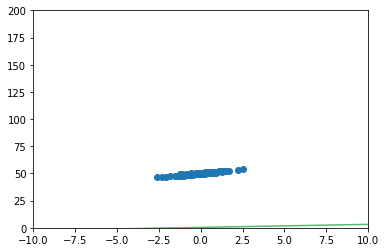

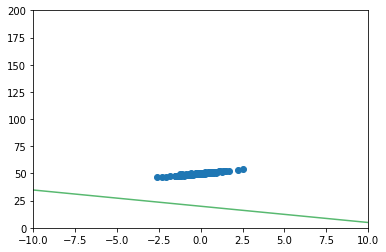

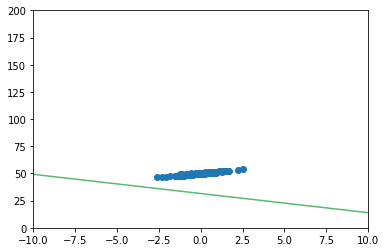

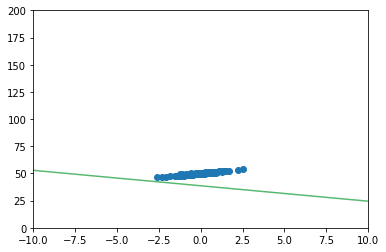

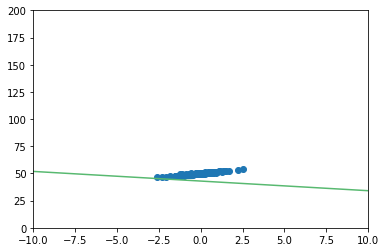

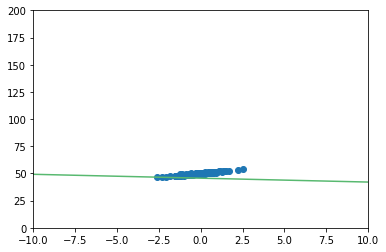

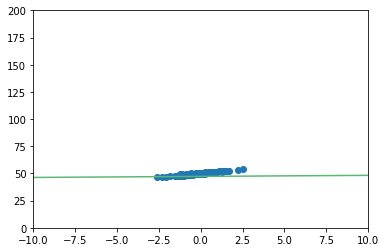

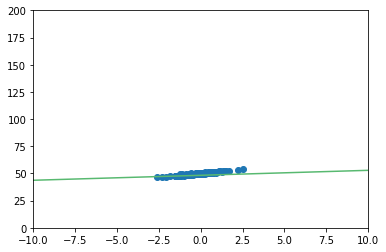

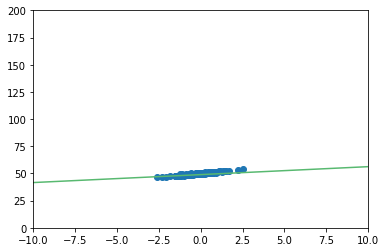

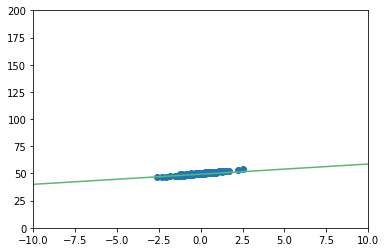

In [0]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

X, y= make_regression(n_samples=100, n_features=1, noise=0.4, bias=50)




def plotLine(theta0, theta1, X, y):
    max_x = np.max(X) + 100
    min_x = np.min(X) - 100


    xplot = np.linspace(min_x, max_x, 1000)
    yplot = theta0 + theta1 * xplot



    plt.plot(xplot, yplot, color='#58b970', label='Regression Line')

    plt.scatter(X,y)
    plt.axis([-10, 10, 0, 200])
    plt.show()



def hypothesis(theta0, theta1, x):
    return theta0 + (theta1*x) 

def cost(theta0, theta1, X, y):
    costValue = 0 
    for (xi, yi) in zip(X, y):
        costValue += 0.5 * ((hypothesis(theta0, theta1, xi) - yi)**2)
    return costValue


def derivatives(theta0, theta1, X, y):
    dtheta0 = 0
    dtheta1 = 0
    for (xi, yi) in zip(X, y):
        dtheta0 += hypothesis(theta0, theta1, xi) - yi
        dtheta1 += (hypothesis(theta0, theta1, xi) - yi)*xi

    dtheta0 /= len(X)
    dtheta1 /= len(X)

    return dtheta0, dtheta1

def updateParameters(theta0, theta1, X, y, alpha):
    dtheta0, dtheta1 = derivatives(theta0, theta1, X, y)
    theta0 = theta0 - (alpha * dtheta0)
    theta1 = theta1 - (alpha * dtheta1)

    return theta0, theta1
    

def LinearRegression(X, y):
    theta0 = np.random.rand()
    theta1 = np.random.rand()
    
    for i in range(0, 1000):
        if i % 100 == 0:
            plotLine(theta0, theta1, X, y)
        # print(cost(theta0, theta1, X, y))
        theta0, theta1 = updateParameters(theta0, theta1, X, y, 0.005)



    


LinearRegression(X, y)